<a href="https://colab.research.google.com/github/abigailvania99/deepLearning/blob/main/FINAL_Project_DL_II_kelompok_2_GRU_only_Acc_76_46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Project II

##Group 2
Helmi Yusuf Susanto / 2402345085<br>
Abigail Vania / 2402345072<br>
Nathaniel Andrian / 2402345040<br>
Michael / 2402345406<br>

###Import Library

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

###Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Mengambil data tweets dari Google Drive

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Project DL II/Tweets.csv'
df = pd.read_csv(file_path)

###Sample Data Tweets

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


###Jumlah Data

In [ ]:
df.shape

(14640, 15)

###Deksripsi Data

In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


###Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

###Mengecek Apakah ada Data yang Null

In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

###Persentase Data yang Null

In [ ]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

###Menghitung data unik

In [ ]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

###Mengubah Tipe data tweet_created menjadi date

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

###Informasi Data setelah dilakukan perubahan tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

###Data Tweet yang diambil paling awal dan paling akhir

In [ ]:
df['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [ ]:
df['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

###Jumlah Data Tweet per Hari

In [ ]:
df.tweet_created.value_counts()

2015-02-22    3079
2015-02-23    3028
2015-02-21    1557
2015-02-20    1500
2015-02-17    1408
2015-02-19    1376
2015-02-24    1344
2015-02-18    1344
2015-02-16       4
Name: tweet_created, dtype: int64

Text(0.5, 1.0, 'Count of Type of Sentiment')

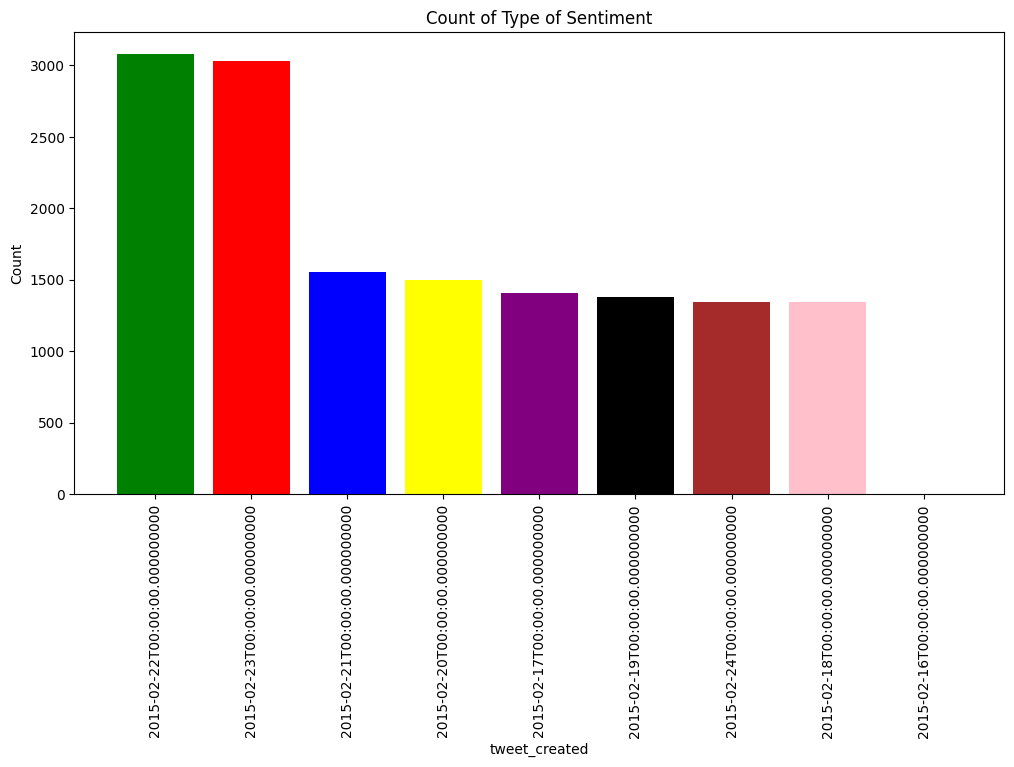

In [ ]:
counter = df.tweet_created.value_counts()
index = [1,2,3,4,5,6,7,8,9]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue','yellow','purple','black',
                             'brown','pink','orange'])
plt.xticks(index,(counter.index.to_numpy()),rotation=90)
plt.xlabel('tweet_created')
plt.ylabel('Count')
plt.title('Count of Type of Sentiment')

###Menghitung Jumlah airline_sentiment per Kategori

In [ ]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Type of Sentiment')

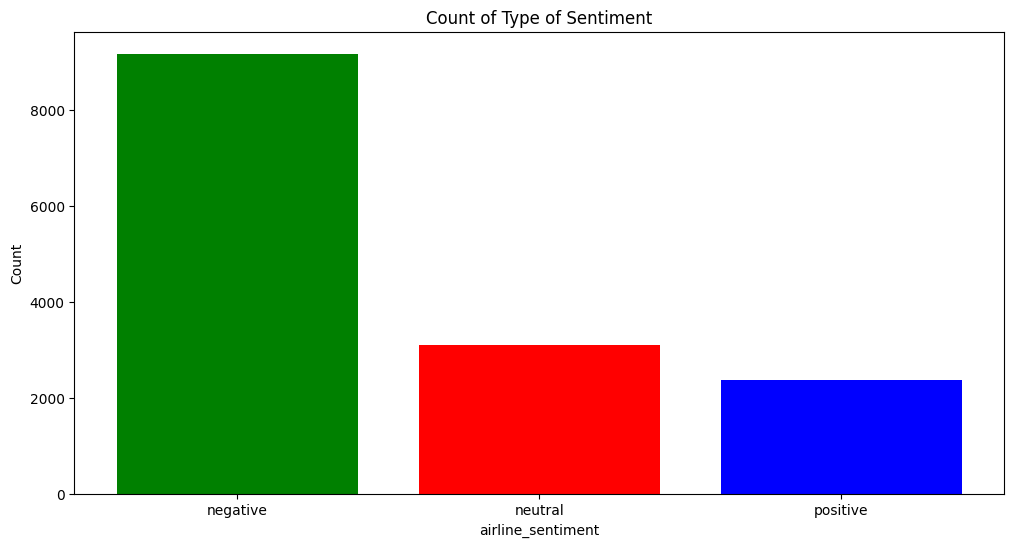

In [ ]:
counter = df.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('airline_sentiment')
plt.ylabel('Count')
plt.title('Count of Type of Sentiment')

###Menghitung Alasan Negative

In [ ]:
negative_reason_counts = df['negativereason'].value_counts()

In [ ]:
negative_reason_counts

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

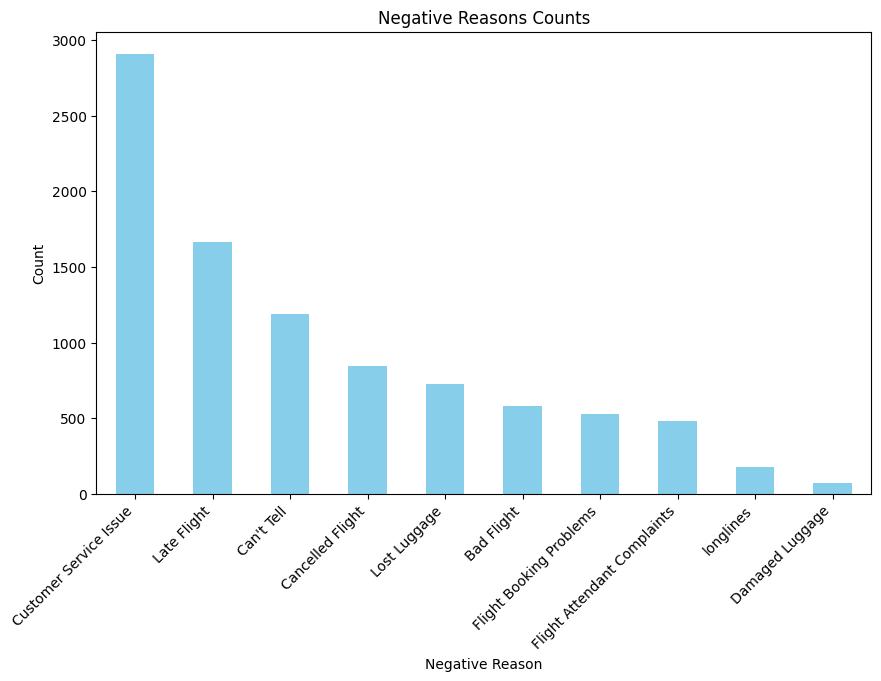

In [ ]:
negative_reason_counts = df['negativereason'].value_counts()

negative_reason_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Negative Reasons Counts')
plt.xlabel('Negative Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


###Menghitung airline_sentiment berdasarkan kategori dan airline

In [ ]:
df.groupby(['airline','airline_sentiment']).size()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64

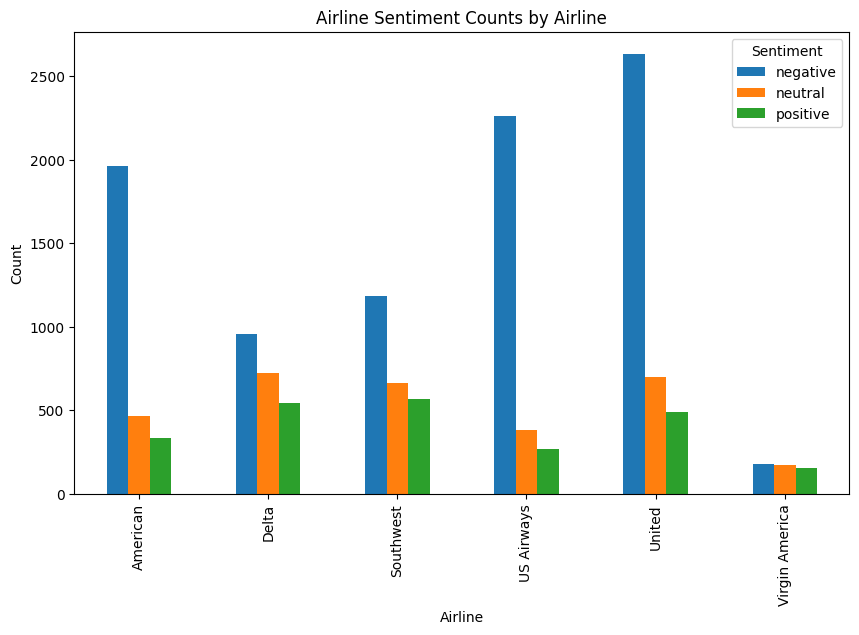

In [ ]:
grouped_data = df.groupby(['airline', 'airline_sentiment']).size()
unstacked_data = grouped_data.unstack()


unstacked_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Airline Sentiment Counts by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1))

plt.show()

###Menghitung Alasan Negative berdasarkan airline

In [ ]:
df.groupby(['airline','negativereason']).size()

airline         negativereason             
American        Bad Flight                      87
                Can't Tell                     198
                Cancelled Flight               246
                Customer Service Issue         768
                Damaged Luggage                 12
                Flight Attendant Complaints     87
                Flight Booking Problems        130
                Late Flight                    249
                Lost Luggage                   149
                longlines                       34
Delta           Bad Flight                      64
                Can't Tell                     186
                Cancelled Flight                51
                Customer Service Issue         199
                Damaged Luggage                 11
                Flight Attendant Complaints     60
                Flight Booking Problems         44
                Late Flight                    269
                Lost Luggage          

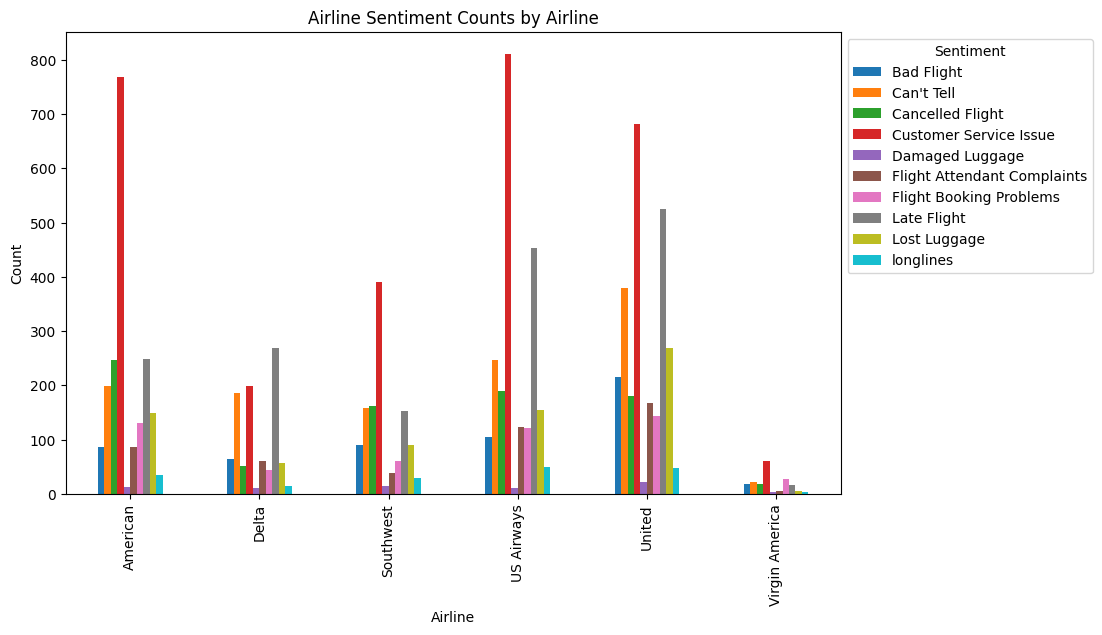

In [ ]:
grouped_data = df.groupby(['airline', 'negativereason']).size()
unstacked_data = grouped_data.unstack()


unstacked_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Airline Sentiment Counts by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1))

plt.show()

###Preprocessing Text

####Cleansing Text
Cleansing Text ini dilakukan dengan melakukan menghilangkan mention, website, emoji, melakukan decontraction, dilajutkan ,menghilangkan hastag, angka, non-word, white-space, dan mengubah text menjadi lower case

In [ ]:
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
def cleansing(df_clean):

    df_clean = [re.sub(r'@\w+', '', i) for i in df_clean] # mention
    df_clean = [re.sub(r'@', '', i) for i in df_clean]
    df_clean = [re.sub(r'https?://\S+|www\.\S+', '', i) for i in df_clean] #link website
    df_clean = [remove_emoji(i) for i in df_clean]
    df_clean = [decontraction(i) for i in df_clean]
    df_clean = [re.sub(r'#', '', i) for i in df_clean] #tanda hastag
    df_clean=[re.sub(r"\d+",'',i )for i in df_clean] #angka
    df_clean=[re.sub(r'[^\w]', ' ', i)for i in df_clean] #non-word
    df_clean=[re.sub(r'\s+',' ',i)for i in df_clean] #whitespace
    df_clean=[i.lower() for i in df_clean] #lower case
    return df_clean

####Membuat kolom baru untuk text yang sudah dibersihkan

In [ ]:
df['clean_text'] = cleansing(df['text'])

In [ ]:
df['clean_text'][6811]

' wow thx for thinking of us greg heard sobewff was amazing we have heard the same about ps thx for the info teamnkh'

####Melakukan WordCloud pada sentiment positive dan negative setelah cleansing text

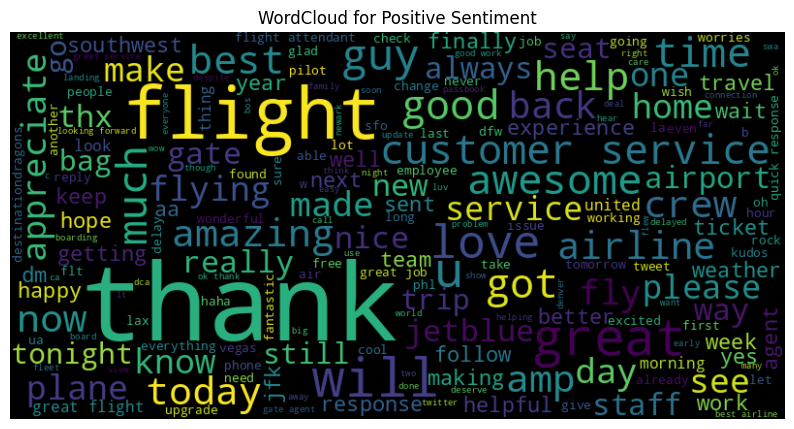

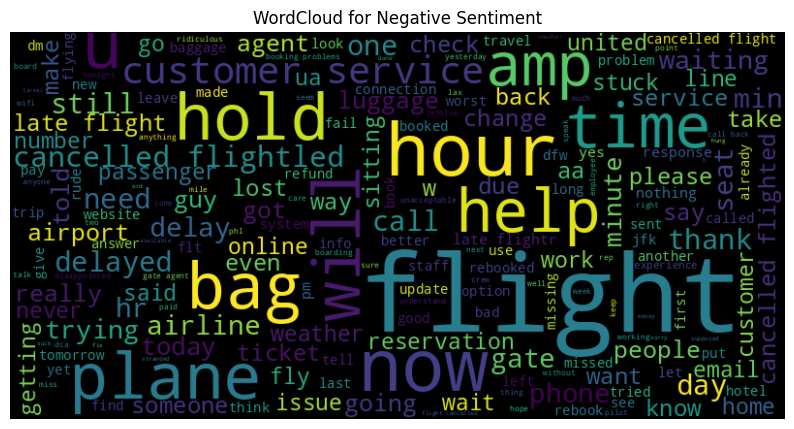

In [ ]:
from wordcloud import WordCloud

positive_text = ' '.join(df[df['airline_sentiment'] == 'positive']['clean_text'])

wordcloud_positive = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(positive_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis('off')
plt.title('WordCloud for Positive Sentiment')
plt.show()

negative_text = ' '.join(df[df['airline_sentiment'] == 'negative']['clean_text'])

wordcloud_negative = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis('off')
plt.title('WordCloud for Negative Sentiment')
plt.show()


In [ ]:
df['clean_text'].str.split().str.len().max()

33

####Memisahkan data fitur dan target

In [ ]:
x = df['clean_text']
y = df['airline_sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix

Data Train 70% (10248)<br>
Data Validasi 15% (2196)<br>
Data Testing 15% (2196)


In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size = 0.3, random_state = 42,stratify=df['airline_sentiment'])
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, test_size = 0.5, random_state = 42,stratify=y_temp)


In [ ]:
x_train_ori = x_train
x_val_ori = x_val
x_test_ori = x_test

y_train_ori = y_train
y_val_ori = y_val
y_test_ori = y_test

In [ ]:
len(x_train_ori)

10248

In [ ]:
len(x_val_ori)

2196

In [ ]:
len(x_test_ori)

2196

####Melakukan labelencoder

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)

####Melihat Data terpanjang pada data training

In [ ]:
 x_train.str.split().str.len().max()

33

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###Preprocessing Text Training

####Melakukan Tokenisasi

In [ ]:
token = [word_tokenize(i) for i in x_train]

####Menghilangkan Stopword

In [ ]:
filtered_token_train = list(map(lambda sublist: list(filter(lambda word: word not in stop_words, sublist)), token))


####Melakukan Lemmatisasi

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in sublist] for sublist in filtered_token_train]

####Melakukan vectorisasi dengan metode Skipgram

In [ ]:
import gensim
from gensim.models import Word2Vec


#####Dengan min count=1, vector sizenya 150 dan windownya 10

In [ ]:
model_skipgram = gensim.models.Word2Vec(lemmatized_tokens, min_count = 1,vector_size = 150, window = 10, sg=1)

#####Melakukan Dictionary
Digunakan untuk membuat kamus yang mengaitkan setiap kata dalam vocabulary model Skip-gram dengan vektor representasinya

In [ ]:
vocabulary_skipgram = model_skipgram.wv.index_to_key
word_vec_dict={}
for word in vocabulary_skipgram:
    word_vec_dict[word]=model_skipgram.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict))


The no of key-value pairs :  8503


#####Melakukan tokenize lagi
Untuk memproses teks (yang sudah dilemmatisasi) menjadi representasi numerik

In [ ]:
from keras.preprocessing.text import one_hot,Tokenizer
tok = Tokenizer()
tok.fit_on_texts(lemmatized_tokens)
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(lemmatized_tokens)

In [ ]:
vocab_size

8504

In [ ]:
max_sen_len= df['clean_text'].str.split().str.len().max()
vocab_size =vocab_size
embed_dim=150

#####Membuat Embedding Matrix

In [ ]:
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
    embed_vector=word_vec_dict.get(word)
    if embed_vector is not None:
        embed_matrix[i]=embed_vector

#####Menambahkan Padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_rev= pad_sequences(encd_rev, maxlen=max_sen_len, padding='post')
pad_rev.shape

(10248, 33)

###Preprocessing Text Validation dan Testing

####Melakukan Tokenize

In [ ]:
word_token_test =[word_tokenize(i) for i in x_test]
word_token_val =[word_tokenize(i) for i in x_val]

####Menghilangkan Stopword

In [ ]:
filtered_token_test = [[word for word in sublist if word not in stop_words] for sublist in word_token_test]
filtered_token_val = [[word for word in sublist if word not in stop_words] for sublist in word_token_val]

####Melakukan Lemmatisasi

In [ ]:
lemmatized_tokens_test = [[lemmatizer.lemmatize(word) for word in sublist] for sublist in filtered_token_test]
lemmatized_tokens_val = [[lemmatizer.lemmatize(word) for word in sublist] for sublist in filtered_token_val]

####Mengubah Text menjadi angka (Tokenize kembali)

In [ ]:
encd_rev_test = tok.texts_to_sequences(lemmatized_tokens_test)
encd_rev_val = tok.texts_to_sequences(lemmatized_tokens_val)

####Menambahkan Padding

In [ ]:
pad_rev_test= pad_sequences(encd_rev_test, maxlen=max_sen_len, padding='post')
pad_rev_test.shape

(2196, 33)

In [ ]:
pad_rev_val= pad_sequences(encd_rev_val, maxlen=max_sen_len, padding='post')
pad_rev_val.shape

(2196, 33)

#BiGRU

###BiGRU Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, BatchNormalization, Dense, Bidirectional
from tensorflow.keras.initializers import Constant, Orthogonal

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_sen_len,
                    embeddings_initializer=Constant(embed_matrix)))
model.add(Bidirectional(GRU(max_sen_len, kernel_initializer=Orthogonal())))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(3, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 150)           1275600   
                                                                 
 bidirectional (Bidirection  (None, 66)                36630     
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 66)                264       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                2144      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 5

####Menentukan Callback

In [ ]:
earlystopping = EarlyStopping( monitor = 'val_loss',
                              min_delta = 0,
                               patience = 10,
                               verbose = 1,
                               restore_best_weights = True)

reducelr = ReduceLROnPlateau( monitor = 'val_loss',
                             factor = 0.5,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.00001)
path_model_GRU = '/content/drive/MyDrive/Colab Notebooks/Project DL II/GRU_only(23).h5'
checkpoint_GRU = ModelCheckpoint (path_model_GRU,
                             verbose = 1,
                              save_best_only = True,
                              period = 1)

callback = [earlystopping, reducelr, checkpoint_GRU]

####Melakukan Training GRU Model

In [ ]:

history = model.fit(pad_rev, y_train, batch_size=64, epochs=30, callbacks=[callback],validation_data=(pad_rev_val, y_val))

Epoch 1/30
159/161 [============================>.] - ETA: 0s - loss: 0.7257 - accuracy: 0.6939
Epoch 1: val_loss improved from inf to 0.83843, saving model to /content/drive/MyDrive/Colab Notebooks/Project DL II/GRU_only(23).h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - 13s 57ms/step - loss: 0.7258 - accuracy: 0.6940 - val_loss: 0.8384 - val_accuracy: 0.6266 - lr: 0.0010
Epoch 2/30
159/161 [============================>.] - ETA: 0s - loss: 0.4281 - accuracy: 0.8333
Epoch 2: val_loss improved from 0.83843 to 0.70578, saving model to /content/drive/MyDrive/Colab Notebooks/Project DL II/GRU_only(23).h5
161/161 [==============================] - 7s 44ms/step - loss: 0.4277 - accuracy: 0.8331 - val_loss: 0.7058 - val_accuracy: 0.6999 - lr: 0.0010
Epoch 3/30
160/161 [============================>.] - ETA: 0s - loss: 0.2448 - accuracy: 0.9119
Epoch 3: val_loss improved from 0.70578 to 0.59189, saving model to /content/drive/MyDrive/Colab Notebooks/Project DL II/GRU_only(23).h5
161/161 [==============================] - 7s 45ms/step - loss: 0.2447 - accuracy: 0.9120 - val_loss: 0.5919 - val_accuracy: 0.7546 - lr: 0.0010
Epoch 4/30
160/161 [============================>.] - ETA: 0s - loss: 0.1652 - accuracy: 0.9396
Ep

#####Melihat model terbaik pada Epoch ke berapa

In [ ]:
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Model terbaik berada di epoch: {best_epoch}")

Model terbaik berada di epoch: 3


####Testing

#####Melakukan Prediksi berdasarkan model terbaik

In [ ]:
model.set_weights(earlystopping.best_weights)
test_predict=model.predict(pad_rev_test)
classes_test=np.argmax(test_predict,axis=1)

69/69 [==============================] - 1s 5ms/step


#####Hasil Prediksi

In [ ]:
classes_test

array([0, 0, 0, ..., 0, 0, 2])

In [ ]:
y_test_original = np.argmax(y_test, axis=1)
y_train_original = np.argmax(y_train, axis=1)
y_val_original = np.argmax(y_val, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_original, classes_test)

print(f'Test Akurasi model: {accuracy * 100:.2f}%')

Test Akurasi model: 76.41%


In [ ]:
test_loss = model.evaluate(pad_rev_test, y_test, verbose=0)

print(f'Test Loss model: {test_loss[0]:.4f}')

Test Loss model: 0.5881


###Classification Report

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test_original, classes_test))


Classification Report

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1377
           1       0.66      0.39      0.49       465
           2       0.73      0.60      0.66       354

    accuracy                           0.76      2196
   macro avg       0.72      0.64      0.67      2196
weighted avg       0.75      0.76      0.75      2196



###Plot Training dan Validasi

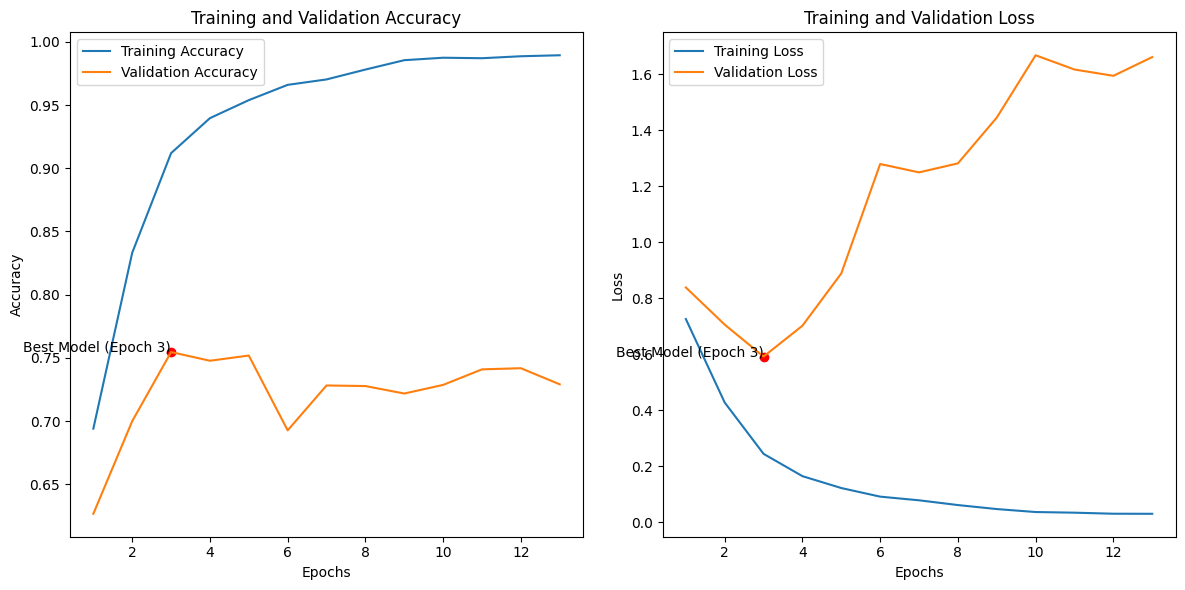

In [ ]:

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.scatter(best_epoch, val_accuracy[best_epoch-1], color='red')

plt.text(best_epoch, val_accuracy[best_epoch-1], f'Best Model (Epoch {best_epoch})', color='black', fontsize=10, ha='right')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.scatter(best_epoch, val_loss[best_epoch-1], color='red')
plt.text(best_epoch, val_loss[best_epoch-1], f'Best Model (Epoch {best_epoch})', color='black', fontsize=10, ha='right')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


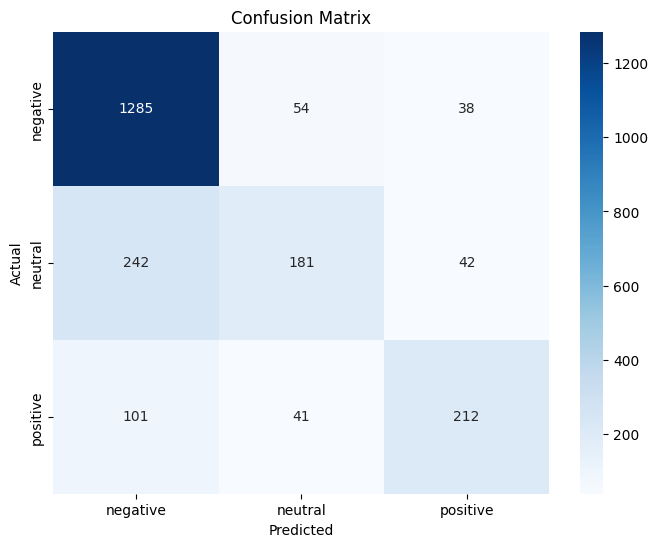

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_mat = confusion_matrix(y_test_original, classes_test)

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###Jumlah Data Negatif, Netral, Positif pada data Training, Testing dan Validasi

In [ ]:
# Data Train
print("Data Train:")
print("Jumlah data Negative Train:", sum(y_train_original == label_encoder.transform(['negative'])[0]))
print("Jumlah data Neutral Train:", sum(y_train_original == label_encoder.transform(['neutral'])[0]))
print("Jumlah data Positive Train:", sum(y_train_original == label_encoder.transform(['positive'])[0]))

# Data Validation
print("\nData Validation:")
print("Jumlah data Negative Validation:", sum(y_val_original == label_encoder.transform(['negative'])[0]))
print("Jumlah data Neutral Validation:", sum(y_val_original == label_encoder.transform(['neutral'])[0]))
print("Jumlah data Positive Validation:", sum(y_val_original == label_encoder.transform(['positive'])[0]))

# Data Test
print("\nData Test:")
print("Jumlah data Negative Test:", sum(y_test_original == label_encoder.transform(['negative'])[0]))
print("Jumlah data Neutral Test:", sum(y_test_original == label_encoder.transform(['neutral'])[0]))
print("Jumlah data Positive Test:", sum(y_test_original == label_encoder.transform(['positive'])[0]))


Data Train:
Jumlah data Negative Train: 6425
Jumlah data Neutral Train: 2169
Jumlah data Positive Train: 1654

Data Validation:
Jumlah data Negative Validation: 1376
Jumlah data Neutral Validation: 465
Jumlah data Positive Validation: 355

Data Test:
Jumlah data Negative Test: 1377
Jumlah data Neutral Test: 465
Jumlah data Positive Test: 354


###Teks yang salah Prediksi

In [ ]:
incorrect_predictions = np.where(classes_test != y_test_original)[0]
incorrect_samples = x_test.iloc[incorrect_predictions]
true_labels = y_test_original[incorrect_predictions]
predicted_labels = classes_test[incorrect_predictions]


In [ ]:
print(len(incorrect_samples))
for i in range(len(incorrect_samples)):
    print(f"Teks: {incorrect_samples.iloc[i]}")
    print(f"Label Sebenarnya: {label_encoder.classes_[true_labels[i]]}")
    print(f"Prediksi Model: {label_encoder.classes_[predicted_labels[i]]}")
    print("\n")


518
Teks:  would you say a delay is more likely thanks so much 
Label Sebenarnya: positive
Prediksi Model: negative


Teks:  can you help me add my ktn to this reservation plz 
Label Sebenarnya: neutral
Prediksi Model: negative


Teks:  thanks 
Label Sebenarnya: neutral
Prediksi Model: positive


Teks:  global first class lounge ord menu yummy 
Label Sebenarnya: positive
Prediksi Model: neutral


Teks:  i see several economy plus can you put us in those we do not have to be seated together
Label Sebenarnya: neutral
Prediksi Model: negative


Teks:  that is what i thought thanks for the clarification 
Label Sebenarnya: neutral
Prediksi Model: negative


Teks: flight booking problems for a travel writers trip i am hosting and need to be happy when i land do you have the cute pjs aa does 
Label Sebenarnya: neutral
Prediksi Model: positive


Teks:  the ball has been dropped my snowboard will not be making it to my destination totalfail letdown
Label Sebenarnya: negative
Prediksi Model: neu